# E_Commerce_project_25_03

# project  :

## Predict the Ecommerce customer churn 
 
 
what is customer churn? 

Customer churn refers to the number of customers that have stopped using and paying for your product or service.

In [ ]:
Why this project?
start with 

##### project group members:
    1.
    2.
    3.

## Problem Statement

### 1.Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.feature_selection import chi2,f_classif,mutual_info_classif,VarianceThreshold,RFE
from mlxtend.feature_selection import SequentialFeatureSelector,ExhaustiveFeatureSelector
from sklearn.decomposition import PCA


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay



import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

import warnings
warnings.filterwarnings('ignore')

## RAW Data :
    data engineer will provide the data 
    SQL and MongoDB 

### 2.Data Gathering

In [2]:
data =  pd.read_excel("E Commerce Dataset.xlsx",sheet_name="Data Dict")
df = pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")

In [3]:
data # for reference purpose only

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer
5,NaN,E Comm,CityTier,City tier
6,NaN,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,NaN,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,NaN,E Comm,Gender,Gender of customer
9,NaN,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


In [160]:
data['Unnamed: 3'].tolist()[1:]

['Unique customer ID',
 'Churn Flag',
 'Tenure of customer in organization',
 'Preferred login device of customer',
 'City tier',
 'Distance in between warehouse to home of customer',
 'Preferred payment method of customer',
 'Gender of customer',
 'Number of hours spend on mobile application or website',
 'Total number of deceives is registered on particular customer',
 'Preferred order category of customer in last month',
 'Satisfactory score of customer on service',
 'Marital status of customer',
 'Total number of added added on particular customer',
 'Any complaint has been raised in last month',
 'Percentage increases in order from last year',
 'Total number of coupon has been used in last month',
 'Total number of orders has been places in last month',
 'Day Since last order by customer',
 'Average cashback in last month']

In [5]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [6]:
print("Total Number Of Features : ",df.shape[1])
print("Total Number Of Data Rows : ",df.shape[0])

Total Number Of Features :  20
Total Number Of Data Rows :  5630


### 3.Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [9]:
df.describe(include="all")

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


##### 3.1 CustomerID

In [10]:
# customer ID is unique value column 
# we don't need such type of feature in our model

In [11]:
df.drop('CustomerID',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [13]:
#Null values in Data Frame

In [14]:
df.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [15]:
df.isna().mean()*100

Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

##### 3.2 Churn

In [16]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [17]:
# This is our target variable which is in categorical form.
# Also from above outcome,we can say that the data is imbalaced and we need to use balancing techniques to make data balanced.

##### 3.3 Tenure

In [18]:
df['Tenure'].value_counts()

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

<AxesSubplot: xlabel='Tenure', ylabel='Density'>

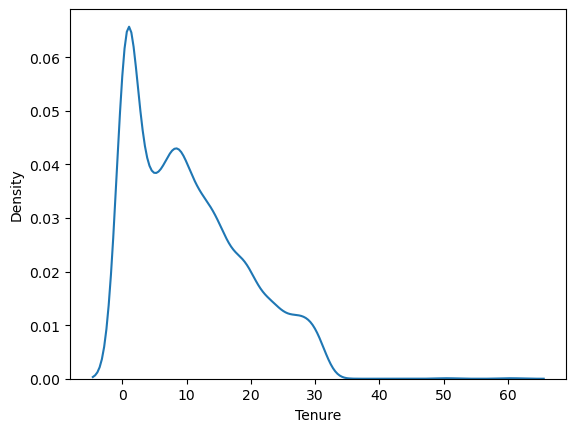

In [19]:
sns.kdeplot(df['Tenure'])

<AxesSubplot: >

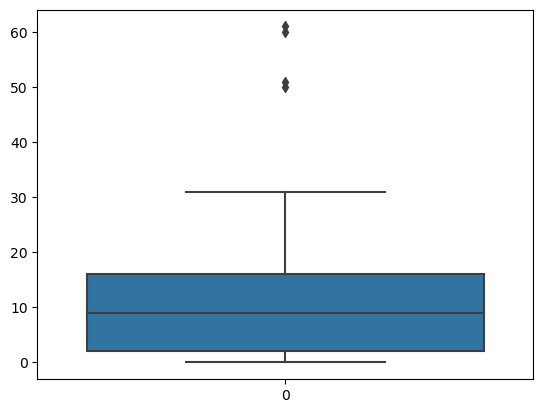

In [20]:
sns.boxplot(df['Tenure'])

In [21]:
df['Tenure'].isna().mean()

0.04689165186500888

In [22]:
df['Tenure'].mean()

10.189899366380917

In [23]:
df['Tenure'].median()

9.0

In [24]:
df['Tenure'].fillna(df['Tenure'].median(),inplace=True)

<AxesSubplot: >

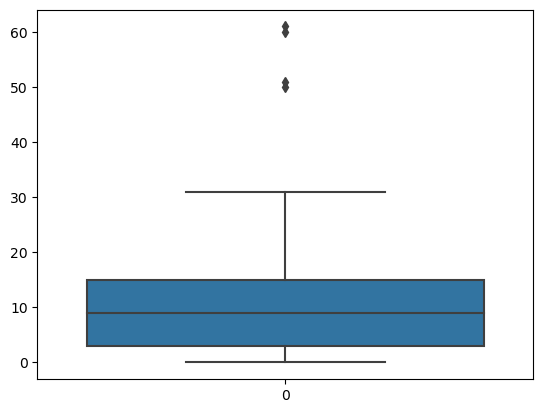

In [25]:
sns.boxplot(df['Tenure'])

In [26]:
# Outlier detection and handling

In [27]:
class Outlier_Handling():

    def outlier_list(self,feature):

        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)

        iqr = q3 - q1

        self.upper_tail = q3 + 1.5 * iqr
        self.lower_tail = q1 - 1.5 * iqr

        
        index_list = list(np.where(df[feature] > self.upper_tail)[0])
        index_list.extend(list(np.where(df[feature] < self.lower_tail)[0]))

        return df[feature][index_list]
    
    def remove_outlier(self,feature):
        
        df[feature] = np.where(df[feature] > self.upper_tail,self.upper_tail,df[feature])
        df[feature] = np.where(df[feature] < self.lower_tail,self.lower_tail,df[feature])
        
        return df[feature]
    

In [28]:
outlier = Outlier_Handling()

outlier.outlier_list("Tenure")

928     50.0
2719    60.0
3743    51.0
5534    61.0
Name: Tenure, dtype: float64

In [29]:
outlier.remove_outlier('Tenure')

0        4.0
1        9.0
2        9.0
3        0.0
4        0.0
        ... 
5625    10.0
5626    13.0
5627     1.0
5628    23.0
5629     8.0
Name: Tenure, Length: 5630, dtype: float64

<AxesSubplot: >

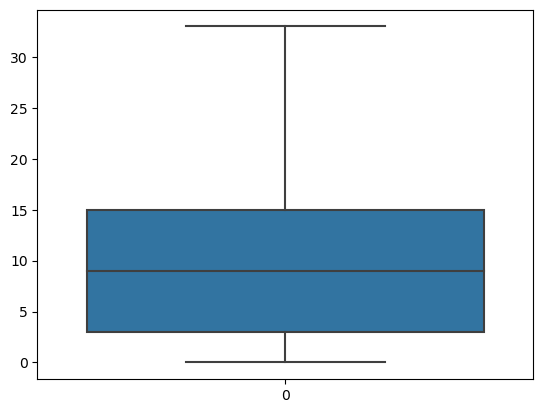

In [30]:
sns.boxplot(df['Tenure'])

<AxesSubplot: xlabel='Tenure', ylabel='Churn'>

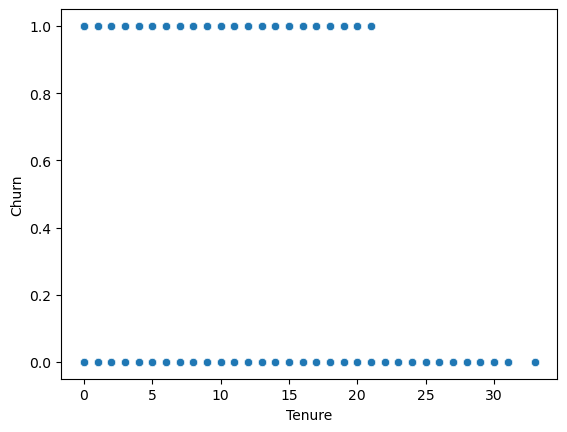

In [31]:
sns.scatterplot(y= df['Churn'], x=df['Tenure'] )

##### 3.4 PreferredLoginDevice

In [32]:
df['PreferredLoginDevice']

0       Mobile Phone
1              Phone
2              Phone
3              Phone
4              Phone
            ...     
5625        Computer
5626    Mobile Phone
5627    Mobile Phone
5628        Computer
5629    Mobile Phone
Name: PreferredLoginDevice, Length: 5630, dtype: object

In [33]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

<AxesSubplot: xlabel='Churn', ylabel='PreferredLoginDevice'>

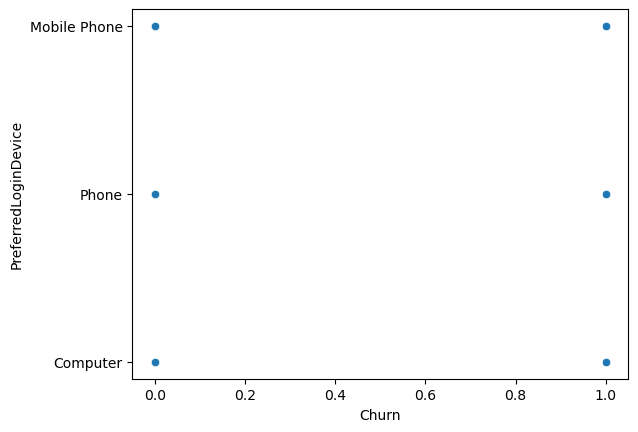

In [34]:
sns.scatterplot(x = df['Churn'], y =df['PreferredLoginDevice'])

##### 3.5 CityTier

In [35]:
df['CityTier'].value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

<AxesSubplot: ylabel='CityTier'>

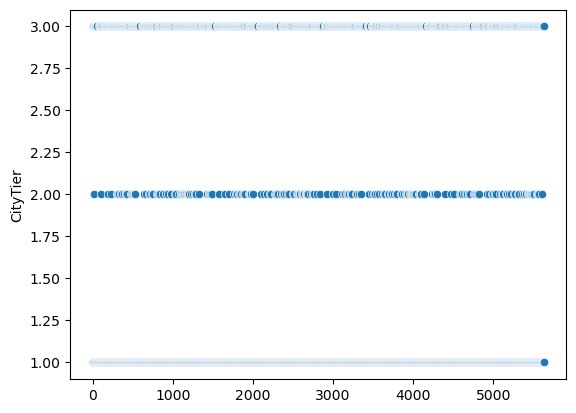

In [36]:
sns.scatterplot(df['CityTier'])

<AxesSubplot: xlabel='Churn', ylabel='CityTier'>

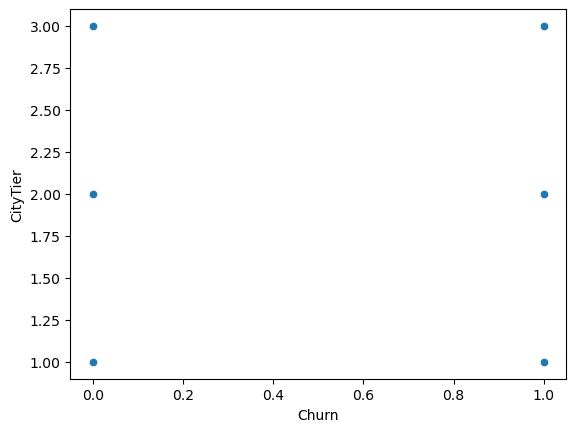

In [37]:
sns.scatterplot(x = df['Churn'],y = df['CityTier'])

##### 3.6 WarehouseToHome

In [38]:
df['WarehouseToHome'].value_counts()

9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     104
31.0     101
23.0      96
30.0      94
32.0      94
35.0      93
18.0      89
26.0      89
25.0      86
21.0      85
24.0      85
27.0      81
29.0      81
19.0      75
20.0      74
28.0      71
33.0      67
34.0      63
36.0      51
5.0        8
126.0      1
127.0      1
Name: WarehouseToHome, dtype: int64

In [39]:
df['WarehouseToHome'].isna().sum()

251

<AxesSubplot: xlabel='WarehouseToHome', ylabel='Density'>

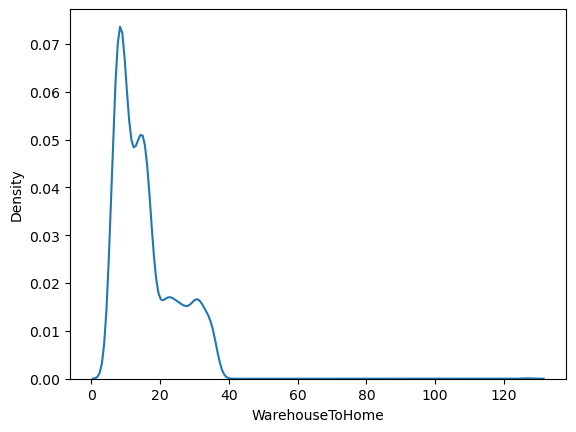

In [40]:
sns.kdeplot(x=df['WarehouseToHome'])

<AxesSubplot: >

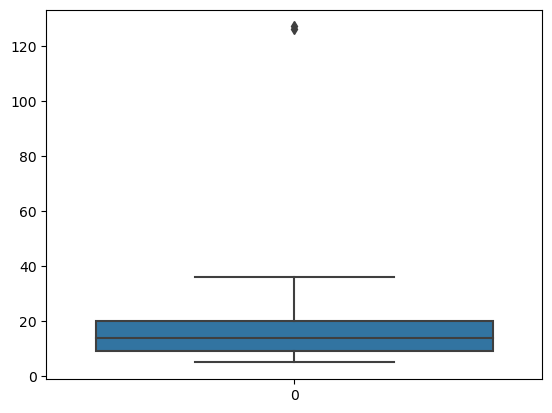

In [41]:
sns.boxplot(df['WarehouseToHome'])

In [42]:
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(),inplace=True)

<AxesSubplot: xlabel='WarehouseToHome'>

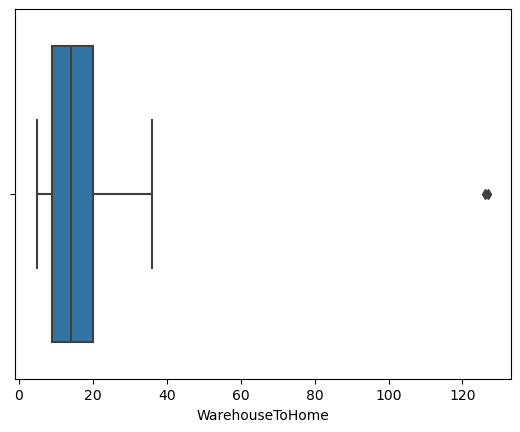

In [43]:
sns.boxplot(x=df['WarehouseToHome'])

In [44]:
#outlier handling

In [45]:
outlier.outlier_list('WarehouseToHome')

1309    126.0
4124    127.0
Name: WarehouseToHome, dtype: float64

In [46]:
outlier.remove_outlier('WarehouseToHome')

0        6.0
1        8.0
2       30.0
3       15.0
4       12.0
        ... 
5625    30.0
5626    13.0
5627    11.0
5628     9.0
5629    15.0
Name: WarehouseToHome, Length: 5630, dtype: float64

<AxesSubplot: xlabel='WarehouseToHome'>

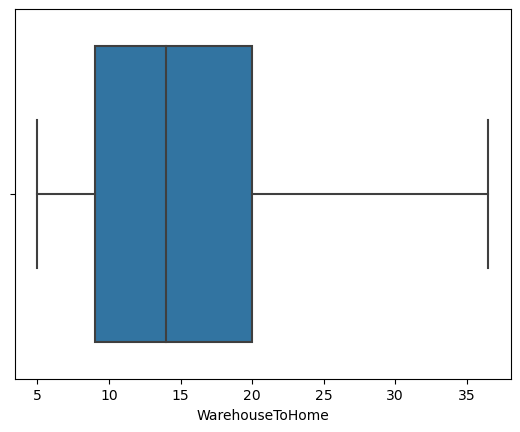

In [47]:
sns.boxplot(x=df['WarehouseToHome'])

##### 3.7 PreferredPaymentMode

In [48]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

##### 3.8 Gender

In [49]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

##### 3.9 HourSpendOnApp

In [50]:
df['HourSpendOnApp'].value_counts()

3.0    2687
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: HourSpendOnApp, dtype: int64

In [51]:
df['HourSpendOnApp'].isna().sum()

255

<AxesSubplot: >

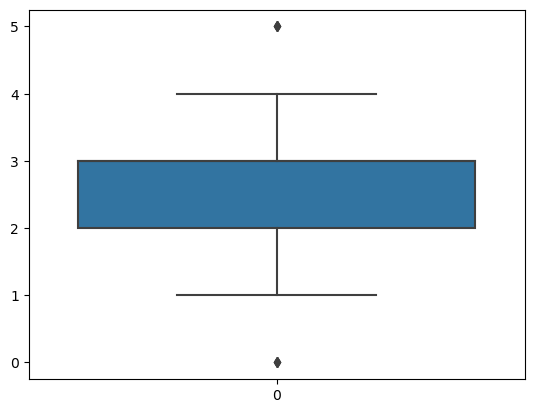

In [52]:
sns.boxplot(df['HourSpendOnApp'])

In [53]:
df['HourSpendOnApp'].median()

3.0

In [54]:
df['HourSpendOnApp'].mean()

2.9315348837209303

In [55]:
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(),inplace=True)

In [56]:
# Outlier handling

In [57]:
outlier.outlier_list('HourSpendOnApp')

4223    5.0
4248    5.0
4351    5.0
150     0.0
950     0.0
1950    0.0
Name: HourSpendOnApp, dtype: float64

In [58]:
outlier.remove_outlier('HourSpendOnApp')

0       3.0
1       3.0
2       2.0
3       2.0
4       3.0
       ... 
5625    3.0
5626    3.0
5627    3.0
5628    4.0
5629    3.0
Name: HourSpendOnApp, Length: 5630, dtype: float64

<AxesSubplot: >

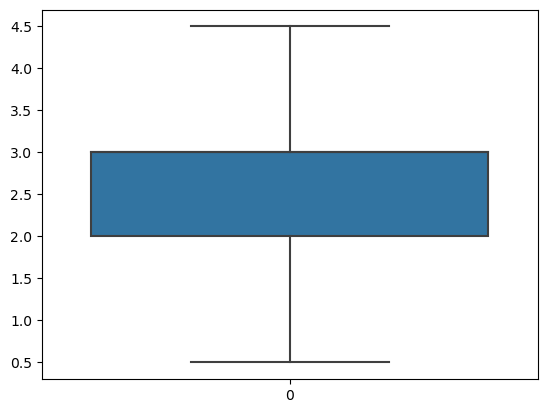

In [59]:
sns.boxplot(df['HourSpendOnApp'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

##### 3.10 NumberOfDeviceRegistered

In [61]:
df['NumberOfDeviceRegistered'].value_counts()

4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64

<AxesSubplot: xlabel='NumberOfDeviceRegistered', ylabel='Density'>

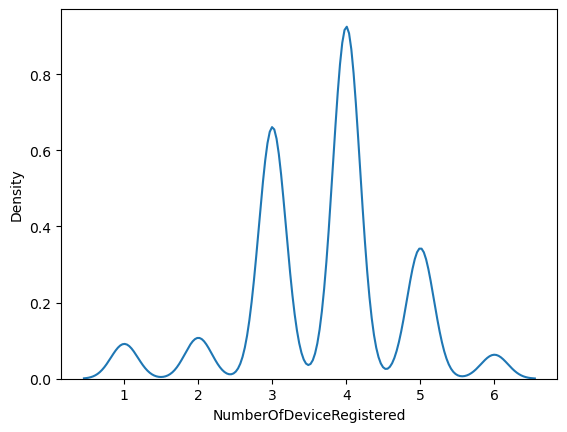

In [62]:
sns.kdeplot(df['NumberOfDeviceRegistered'])

<AxesSubplot: >

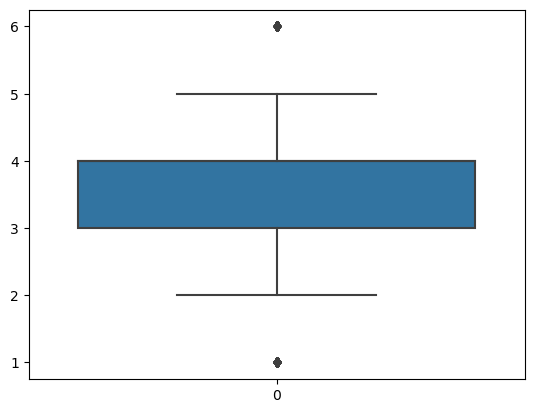

In [63]:
sns.boxplot(df['NumberOfDeviceRegistered'])

In [64]:
outlier.outlier_list('NumberOfDeviceRegistered')

2820    6
2824    6
2833    6
2835    6
2838    6
       ..
2746    1
2777    1
2810    1
2812    1
2814    1
Name: NumberOfDeviceRegistered, Length: 397, dtype: int64

##### 3.11 PreferedOrderCat

In [65]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

##### 3.12 SatisfactionScore

In [66]:
df['SatisfactionScore'].value_counts()

3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

<AxesSubplot: >

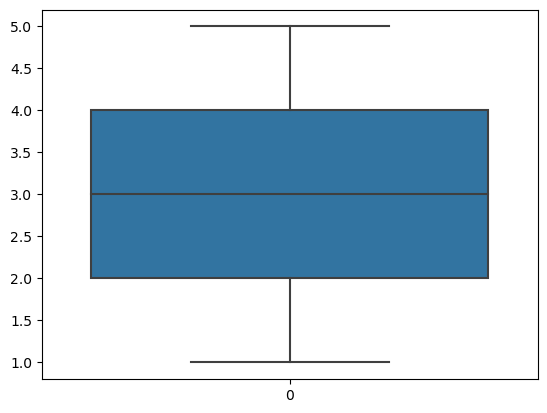

In [67]:
sns.boxplot(df['SatisfactionScore'])

##### 3.13 MaritalStatus

In [68]:
df['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

##### 3.14 NumberOfAddress

In [69]:
df['NumberOfAddress'].value_counts()

2     1369
3     1278
4      588
5      571
6      382
1      371
8      280
7      256
9      239
10     194
11      98
19       1
21       1
20       1
22       1
Name: NumberOfAddress, dtype: int64

<AxesSubplot: >

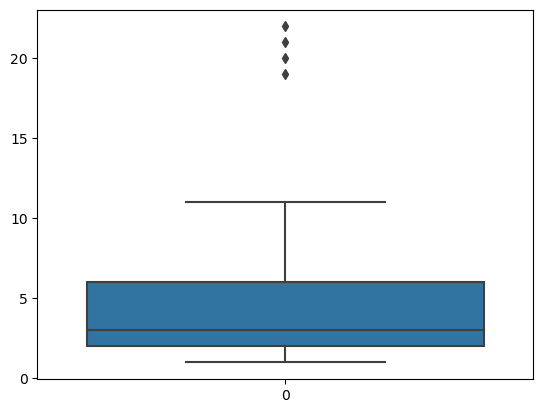

In [70]:
sns.boxplot(df['NumberOfAddress'])

In [71]:
# outlier handling

In [72]:
outlier.outlier_list('NumberOfAddress')

260     19
691     21
3075    20
3506    22
Name: NumberOfAddress, dtype: int64

In [73]:
outlier.remove_outlier('NumberOfAddress')

0       9.0
1       7.0
2       6.0
3       8.0
4       3.0
       ... 
5625    6.0
5626    6.0
5627    3.0
5628    4.0
5629    4.0
Name: NumberOfAddress, Length: 5630, dtype: float64

<AxesSubplot: >

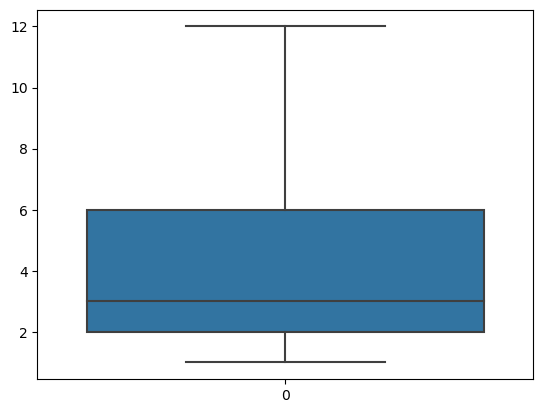

In [74]:
sns.boxplot(df['NumberOfAddress'])

##### 3.15 Complain

In [75]:
df['Complain'].value_counts()

0    4026
1    1604
Name: Complain, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

##### 3.16 OrderAmountHikeFromlastYea

In [77]:
df['OrderAmountHikeFromlastYear'].value_counts()

14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

<AxesSubplot: >

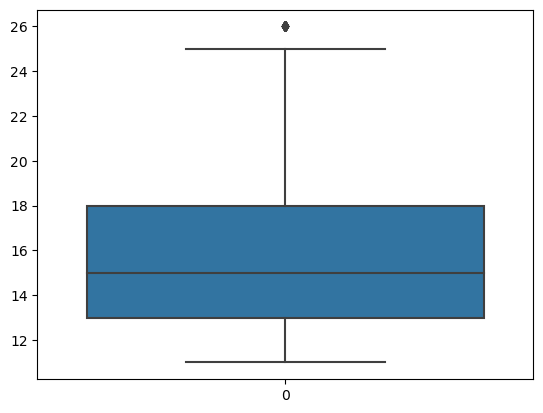

In [78]:
sns.boxplot(df['OrderAmountHikeFromlastYear'])

In [79]:
df['OrderAmountHikeFromlastYear'].isna().sum()

265

In [80]:
df['OrderAmountHikeFromlastYear'].median()

15.0

In [81]:
df['OrderAmountHikeFromlastYear'].mean()

15.707921714818266

In [82]:
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(),inplace=True)

<AxesSubplot: >

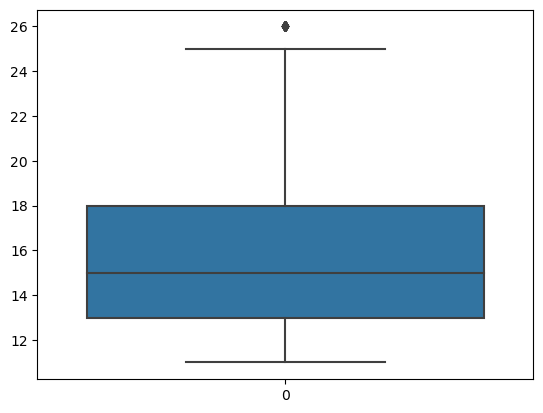

In [83]:
sns.boxplot(df['OrderAmountHikeFromlastYear'])

In [84]:
#outlier handling

In [85]:
outlier.outlier_list('OrderAmountHikeFromlastYear').count()

33

In [86]:
df['OrderAmountHikeFromlastYear'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.])

In [87]:
df['OrderAmountHikeFromlastYear'].value_counts()

15.0    807
14.0    750
13.0    741
12.0    728
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

##### 3.17 CouponUsed

In [89]:
df['CouponUsed'].value_counts()

1.0     2105
2.0     1283
0.0     1030
3.0      327
4.0      197
5.0      129
6.0      108
7.0       89
8.0       42
10.0      14
9.0       13
11.0      12
12.0       9
13.0       8
14.0       5
16.0       2
15.0       1
Name: CouponUsed, dtype: int64

In [90]:
df['CouponUsed'].mean()

1.7510234462225531

In [91]:
df['CouponUsed'].median()

1.0

In [92]:
df['CouponUsed'].isna().sum()

256

<AxesSubplot: >

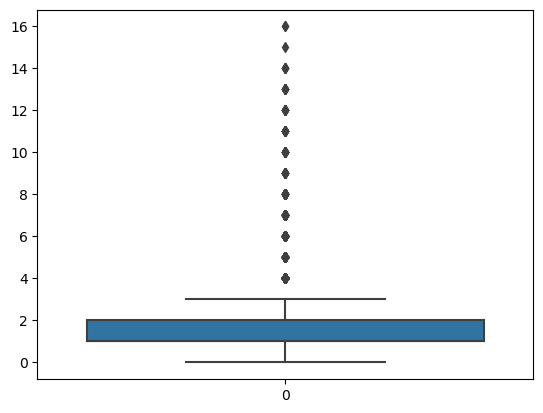

In [93]:
sns.boxplot(df['CouponUsed'])

In [94]:
df['CouponUsed'].fillna(df['CouponUsed'].median(),inplace=True)

<AxesSubplot: >

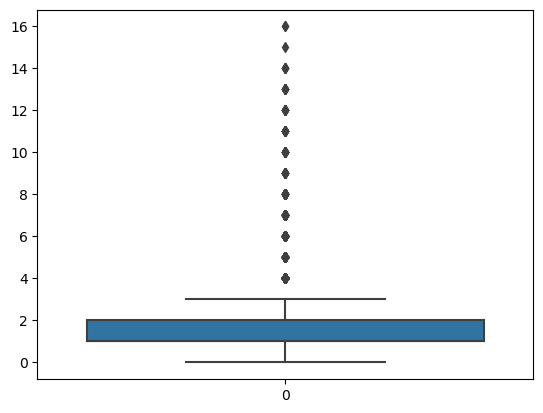

In [95]:
sns.boxplot(df['CouponUsed'])

In [96]:
# outlier handling

In [97]:
outlier.outlier_list('CouponUsed').unique()

array([ 4.,  9.,  6., 11.,  7., 12., 10.,  5., 13., 15.,  8., 14., 16.])

In [98]:
outlier.upper_tail

3.5

In [99]:
outlier.lower_tail

-0.5

In [100]:
outlier.remove_outlier('CouponUsed')

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
5625    1.0
5626    1.0
5627    1.0
5628    2.0
5629    2.0
Name: CouponUsed, Length: 5630, dtype: float64

<AxesSubplot: >

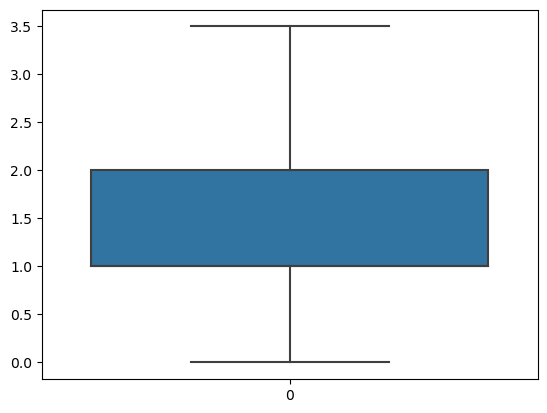

In [101]:
sns.boxplot(df['CouponUsed'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

##### 3.18 OrderCount

In [103]:
df['OrderCount'].value_counts()

2.0     2025
1.0     1751
3.0      371
7.0      206
4.0      204
5.0      181
8.0      172
6.0      137
9.0       62
12.0      54
11.0      51
10.0      36
14.0      36
15.0      33
13.0      30
16.0      23
Name: OrderCount, dtype: int64

In [104]:
df['OrderCount'].isna().sum()

258

In [105]:
df['OrderCount'].median()

2.0

<AxesSubplot: >

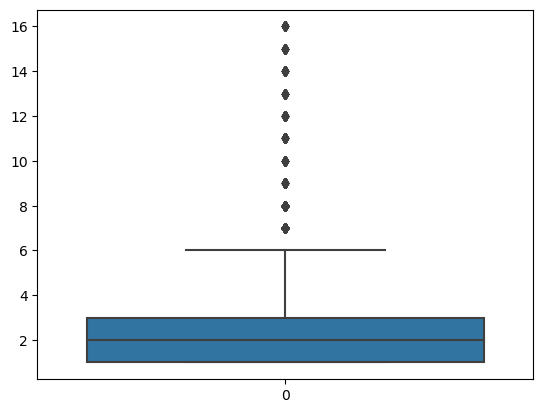

In [106]:
sns.boxplot(df['OrderCount'])

In [107]:
df['OrderCount'].fillna(df['OrderCount'].median(),inplace=True)

In [108]:
#outlier handling

<AxesSubplot: >

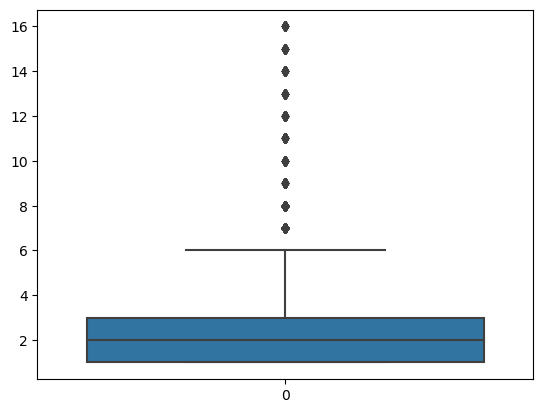

In [109]:
sns.boxplot(df['OrderCount'])

In [110]:
outlier.outlier_list('OrderCount')

10      15.0
20       7.0
21      15.0
42       7.0
47       7.0
        ... 
5578     8.0
5585     9.0
5592     7.0
5604    10.0
5607    12.0
Name: OrderCount, Length: 703, dtype: float64

In [111]:
outlier.remove_outlier('OrderCount')

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5625    2.0
5626    2.0
5627    2.0
5628    2.0
5629    2.0
Name: OrderCount, Length: 5630, dtype: float64

<AxesSubplot: >

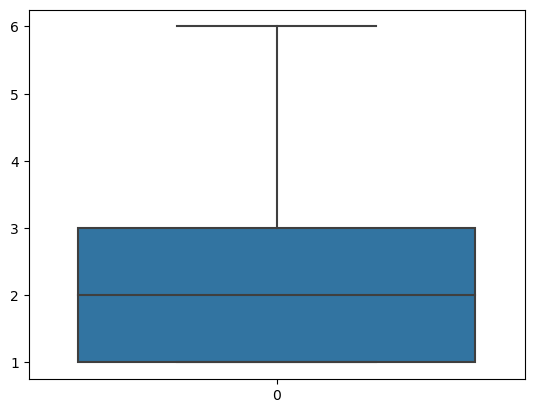

In [112]:
sns.boxplot(df['OrderCount'])

In [113]:
df['OrderCount'].value_counts()

2.0    2283
1.0    1751
6.0     840
3.0     371
4.0     204
5.0     181
Name: OrderCount, dtype: int64

##### 3.19 DaySinceLastOrder

In [114]:
df['DaySinceLastOrder'].value_counts()

3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: DaySinceLastOrder, dtype: int64

In [115]:
df['DaySinceLastOrder'].isna().sum()

307

In [116]:
df['DaySinceLastOrder'].median()

3.0

In [117]:
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(),inplace=True)

<AxesSubplot: xlabel='DaySinceLastOrder'>

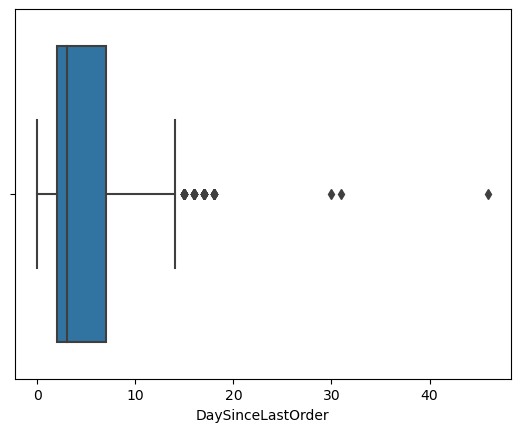

In [118]:
sns.boxplot(x = df['DaySinceLastOrder'])

In [119]:
#outlier handling

In [120]:
outlier.outlier_list('DaySinceLastOrder').unique()

array([15., 17., 16., 30., 46., 18., 31.])

In [121]:
outlier.remove_outlier('DaySinceLastOrder')

0       5.0
1       0.0
2       3.0
3       3.0
4       3.0
       ... 
5625    4.0
5626    3.0
5627    4.0
5628    9.0
5629    3.0
Name: DaySinceLastOrder, Length: 5630, dtype: float64

<AxesSubplot: xlabel='DaySinceLastOrder'>

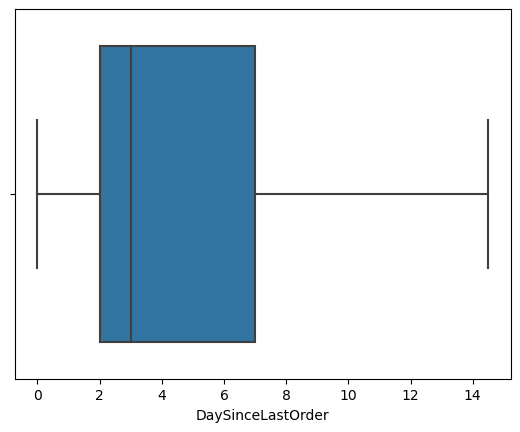

In [122]:
sns.boxplot(x=df['DaySinceLastOrder'])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

##### 3.20 CashbackAmount

In [124]:
df['CashbackAmount'].value_counts()

123.42    8
149.36    8
148.42    8
188.47    7
154.73    7
         ..
174.84    1
127.74    1
145.05    1
174.28    1
173.78    1
Name: CashbackAmount, Length: 2586, dtype: int64

<AxesSubplot: xlabel='CashbackAmount'>

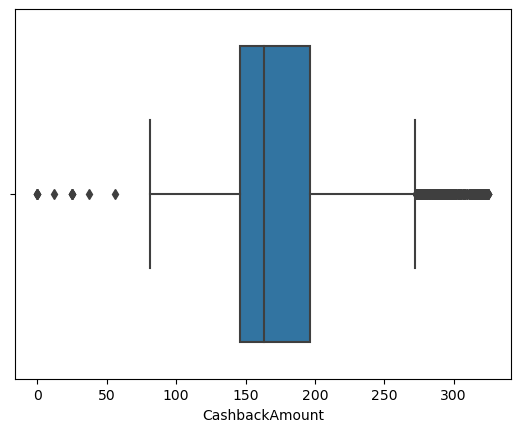

In [125]:
sns.boxplot(x=df['CashbackAmount'])

In [126]:
#outlier detection

In [127]:
outlier.outlier_list('CashbackAmount')

10      295.45
40      299.26
61      290.33
62      287.22
65      299.99
         ...  
2916     25.00
3841     25.00
3991     25.00
4070     25.00
4115     37.00
Name: CashbackAmount, Length: 438, dtype: float64

In [128]:
outlier.remove_outlier('CashbackAmount')

0       159.93
1       120.90
2       120.28
3       134.07
4       129.60
         ...  
5625    150.71
5626    224.91
5627    186.42
5628    178.90
5629    169.04
Name: CashbackAmount, Length: 5630, dtype: float64

<AxesSubplot: xlabel='CashbackAmount'>

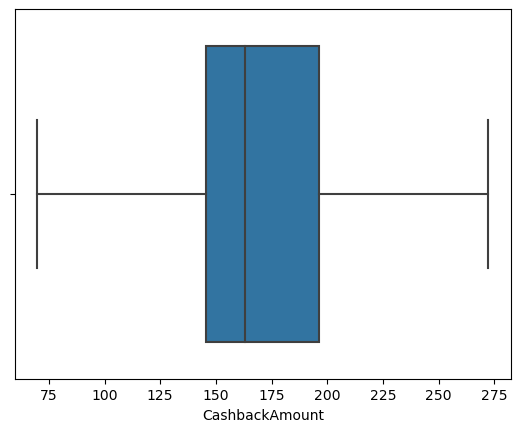

In [129]:
sns.boxplot(x = df['CashbackAmount'])

In [130]:
# EDA part done

### 4.Feature Engineering

In [131]:
#Encoding of categorical variables

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

In [133]:
df['PreferredLoginDevice'].value_counts().to_dict()

{'Mobile Phone': 2765, 'Computer': 1634, 'Phone': 1231}

In [134]:
df['PreferredLoginDevice'].replace({'Mobile Phone': 2, 'Computer': 1, 'Phone': 0},inplace=True) 

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   int64  
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

In [136]:
df = pd.get_dummies(df,columns=['PreferredPaymentMode'])

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5630 non-null   int64  
 1   Tenure                                 5630 non-null   float64
 2   PreferredLoginDevice                   5630 non-null   int64  
 3   CityTier                               5630 non-null   int64  
 4   WarehouseToHome                        5630 non-null   float64
 5   Gender                                 5630 non-null   object 
 6   HourSpendOnApp                         5630 non-null   float64
 7   NumberOfDeviceRegistered               5630 non-null   int64  
 8   PreferedOrderCat                       5630 non-null   object 
 9   SatisfactionScore                      5630 non-null   int64  
 10  MaritalStatus                          5630 non-null   object 
 11  Numb

In [138]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [139]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5630 non-null   int64  
 1   Tenure                                 5630 non-null   float64
 2   PreferredLoginDevice                   5630 non-null   int64  
 3   CityTier                               5630 non-null   int64  
 4   WarehouseToHome                        5630 non-null   float64
 5   Gender                                 5630 non-null   int64  
 6   HourSpendOnApp                         5630 non-null   float64
 7   NumberOfDeviceRegistered               5630 non-null   int64  
 8   PreferedOrderCat                       5630 non-null   object 
 9   SatisfactionScore                      5630 non-null   int64  
 10  MaritalStatus                          5630 non-null   object 
 11  Numb

In [141]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [142]:
df = pd.get_dummies(df,columns=['PreferedOrderCat'])

In [143]:
df['MaritalStatus'].value_counts().to_dict()

{'Married': 2986, 'Single': 1796, 'Divorced': 848}

In [144]:
df['MaritalStatus'].replace({'Married': 2, 'Single': 1, 'Divorced': 0},inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5630 non-null   int64  
 1   Tenure                                 5630 non-null   float64
 2   PreferredLoginDevice                   5630 non-null   int64  
 3   CityTier                               5630 non-null   int64  
 4   WarehouseToHome                        5630 non-null   float64
 5   Gender                                 5630 non-null   int64  
 6   HourSpendOnApp                         5630 non-null   float64
 7   NumberOfDeviceRegistered               5630 non-null   int64  
 8   SatisfactionScore                      5630 non-null   int64  
 9   MaritalStatus                          5630 non-null   int64  
 10  NumberOfAddress                        5630 non-null   float64
 11  Comp

In [146]:
#Encoding part - Done

### 5. Feature selection

In [ ]:
1.Before model training >> Filter methods
2.During model training >> Wrapper methods
3.After  model training >> Embedded Methods

### Filter methods

##### 1. Correlation

In [161]:
df.corr()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
Churn,1.000000,-0.339678,-0.110924,0.084703,0.073529,0.029264,0.018861,0.107939,0.105481,-0.090703,...,-0.064131,-0.032453,0.055751,0.004163,-0.014871,-0.089575,-0.133353,0.113364,0.154387,-0.054903
Tenure,-0.339678,1.000000,0.219343,-0.059555,-0.020914,-0.045926,-0.019195,-0.019024,-0.012767,0.037911,...,0.049793,0.017229,0.010411,-0.037011,0.103387,0.347406,-0.054059,-0.169948,-0.233938,0.267624
PreferredLoginDevice,-0.110924,0.219343,1.000000,0.136237,0.023044,-0.040056,0.164078,0.146031,-0.030101,0.017474,...,0.104817,-0.020148,0.120585,-0.039951,0.237363,0.159731,0.143281,-0.497609,-0.122204,0.147620
CityTier,0.084703,-0.059555,0.136237,1.000000,0.008197,-0.025176,-0.010221,0.027934,-0.011554,-0.027483,...,-0.137236,-0.118713,0.514227,-0.030518,0.063189,0.004160,0.226587,-0.127602,-0.188046,-0.042998
WarehouseToHome,0.073529,-0.020914,0.023044,0.008197,1.000000,-0.004521,0.068421,0.024470,0.013683,0.020368,...,0.028865,-0.030999,0.038226,-0.004746,0.034212,0.035639,0.048814,-0.056977,-0.020760,-0.076574
Gender,0.029264,-0.045926,-0.040056,-0.025176,-0.004521,1.000000,-0.017683,-0.021799,-0.035220,0.030161,...,-0.023132,0.002310,-0.024500,0.043301,-0.025097,-0.048071,-0.019739,0.017308,0.042552,0.033147
HourSpendOnApp,0.018861,-0.019195,0.164078,-0.010221,0.068421,-0.017683,1.000000,0.305416,0.030829,0.017310,...,0.042586,0.023982,0.003347,-0.025082,-0.007496,-0.044874,-0.038291,-0.175644,0.238199,-0.024765
NumberOfDeviceRegistered,0.107939,-0.019024,0.146031,0.027934,0.024470,-0.021799,0.305416,1.000000,-0.017228,-0.021796,...,0.040341,-0.007516,0.025578,0.007815,0.036230,-0.035706,-0.006282,-0.215316,0.168584,0.021423
SatisfactionScore,0.105481,-0.012767,-0.030101,-0.011554,0.013683,-0.035220,0.030829,-0.017228,1.000000,-0.044406,...,0.020594,-0.050365,0.017752,0.008063,0.011944,0.002287,-0.019501,0.005493,0.005577,0.001442
MaritalStatus,-0.090703,0.037911,0.017474,-0.027483,0.020368,0.030161,0.017310,-0.021796,-0.044406,1.000000,...,0.010413,-0.008251,-0.011796,0.030449,0.018038,-0.012780,0.029983,-0.010518,-0.037497,0.008882


<AxesSubplot: >

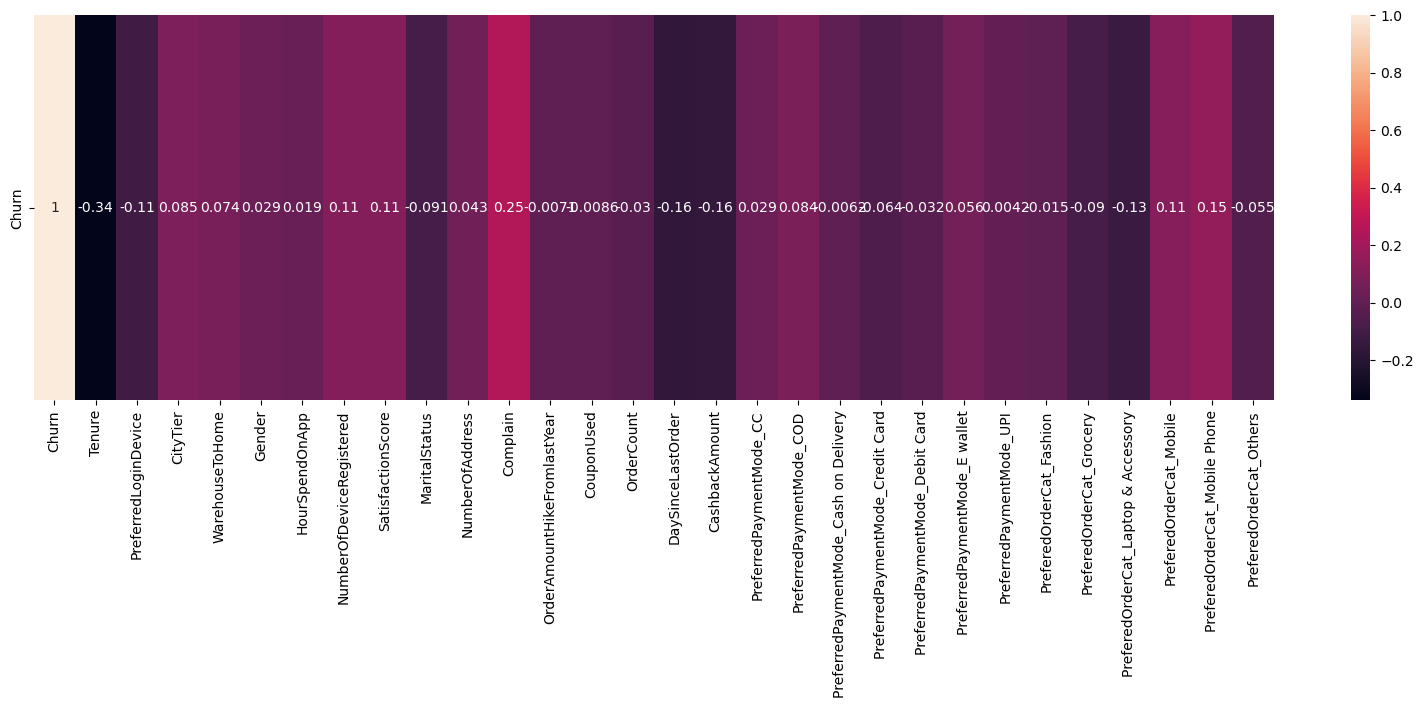

In [162]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr().head(1),annot=True)

### 6.Train Test Split

In [148]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [149]:
from sklearn.model_selection import  train_test_split

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7,stratify=y)

### 7.Model Training

In [ ]:
1. Decision Tree
2. Random Forest
3. Adaboost
4. SVM

#### Decision Tree

In [151]:
dt_clf = DecisionTreeClassifier(random_state=7)
dt_clf.fit(x_train,y_train)

print("Training Accuracy: ",dt_clf.score(x_train,y_train))
print("Testing Accuracy: ",dt_clf.score(x_test,y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9511545293072824


<AxesSubplot: >

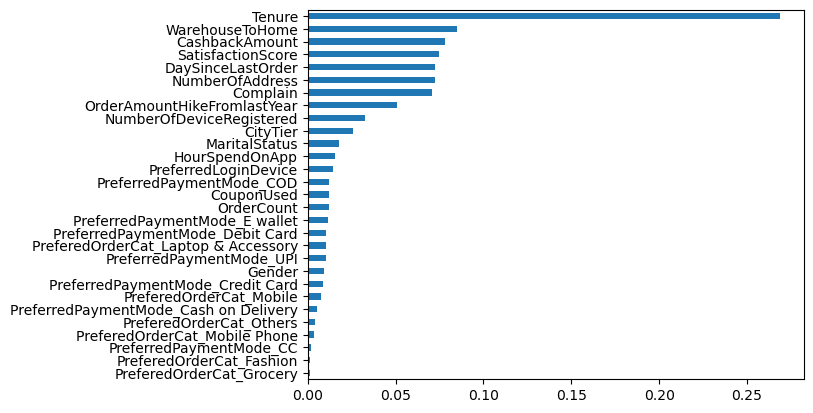

In [152]:
s1 = pd.Series(dt_clf.feature_importances_,index=x_train.columns)
s1.sort_values().plot(kind='barh')

In [ ]:
x_train.shape

In [ ]:
x_test.shape

#### SVM

In [163]:
svm_clf = SVC(random_state=7)
svm_clf.fit(x_train,y_train)

scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test),columns=x_train.columns)

print("Training Accuracy: ",svm_clf.score(x_train_scaled,y_train))
print("Testing Accuracy: ",svm_clf.score(x_test_scaled,y_test))

Training Accuracy:  0.8317051509769094
Testing Accuracy:  0.8312611012433393


Classification report:
                precision    recall  f1-score   support

           0       0.83      1.00      0.91       936
           1       0.00      0.00      0.00       190

    accuracy                           0.83      1126
   macro avg       0.42      0.50      0.45      1126
weighted avg       0.69      0.83      0.75      1126



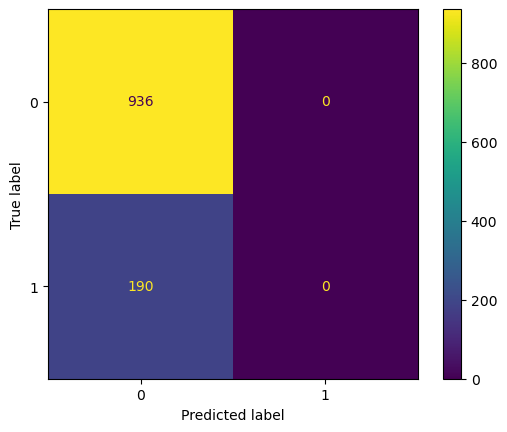

In [164]:
y_pred = svm_clf.predict(x_test)

clf_report = classification_report(y_test,y_pred)
print("Classification report:\n ",clf_report)

cnf_matrix = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(cnf_matrix).plot()

In [ ]:
hyperparameter = {"C":np.arange(1,30),
                 "kernel":['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
svm_clf = SVC(random_state=7)
gscv_svm_clf = GridSearchCV(svm_clf,hyperparameter,cv=5,n_jobs=-1)
gscv_svm_clf.fit(x_train_scaled,y_train)
gscv_svm_clf.best_estimator_

In [ ]:
svm_clf = gscv_svm_clf.best_estimator_
svm_clf.fit(x_train_scaled,y_train)

print("Training Accuracy: ",svm_clf.score(x_train_scaled,y_train))
print("Testing Accuracy: ",svm_clf.score(x_test_scaled,y_test))

#### Random Forest

In [155]:
rf_clf = RandomForestClassifier(random_state=7)
rf_clf.fit(x_train,y_train)

print("Training Accuracy: ",rf_clf.score(x_train,y_train))
print("Testing Accuracy: ",rf_clf.score(x_test,y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9609236234458259


In [ ]:
hyperparamter = {
                "criterion" : ['gini','entropy'],
                "max_depth": np.arange(3,10),
                "min_samples_split": np.arange(3,10),
                "min_samples_leaf":np.arange(1,5),
                }



In [ ]:
rf_clf = RandomForestClassifier(random_state=7,n_jobs=-1)
gscv_rf_clf = GridSearchCV(rf_clf,hyperparamter,cv=5,n_jobs=-1)
gscv_rf_clf.fit(x_train,y_train)
gscv_rf_clf.best_estimator_



In [ ]:
rf_clf = gscv_rf_clf.best_estimator_
rf_clf.fit(x_train,y_train)

print("Training Accuracy: ",rf_clf.score(x_train,y_train))
print("Testing Accuracy: ",rf_clf.score(x_test,y_test))

#### Adaboost

In [157]:
ada_clf = AdaBoostClassifier()

ada_clf.fit(x_train,y_train)

print("Training Accuracy: ",ada_clf.score(x_train,y_train))
print("Testing Accuracy: ",ada_clf.score(x_test,y_test))

Training Accuracy:  0.9047513321492007
Testing Accuracy:  0.9058614564831261


### 8.Model Evaluation

### 9.Best Model Selection

### 10. Model Deployment

### 10.1 Save Model

### 10.2 Save Model Data 

In [ ]:
import sweetviz as sw

In [ ]:
report  = sw.analyze(df)
report.show_html("E_commerce.html")